<a href="https://colab.research.google.com/github/dheekshadevaraj/Employee-resignation-data-Python/blob/main/Employee_resignation_data_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 1: Load the Dataset
file = '/content/Employee_Resignation_ProjectDataset.xlsx'
df = pd.read_excel(file)
print(df)
df.head()

      EmployeeID          Name  Gender  Age Department            JobRole  \
0              1  Sneha Sharma  Female   37         HR      HR Specialist   
1              2   Ravi Sharma    Male   27         HR      HR Specialist   
2              3   Vikas Singh    Male   50  Marketing     SEO Specialist   
3              4    John Patel    Male   43      Sales    Sales Executive   
4              5   John Sharma  Female   56      Sales      Sales Manager   
...          ...           ...     ...  ...        ...                ...   
4995        4996  Anjali Gupta    Male   36         IT  Software Engineer   
4996        4997    Neha Singh    Male   59         IT         IT Support   
4997        4998    Neha Singh  Female   25  Marketing     SEO Specialist   
4998        4999  Sneha Mathew    Male   57         HR      HR Specialist   
4999        5000    Ravi Mehta    Male   46      Sales    Sales Executive   

     DateOfJoining DateOfExit  PerformanceRating     ResignationReason  \
0

,EmployeeID,Name,Gender,Age,Department,JobRole,DateOfJoining,DateOfExit,PerformanceRating,ResignationReason,LastWorkingLocation
0,1,Sneha Sharma,Female,37,HR,HR Specialist,2007-04-20,2023-06-23,5,Better Opportunity,Chennai
1,2,Ravi Sharma,Male,27,HR,HR Specialist,2016-05-02,2024-01-31,1,Work-life Balance,Hyderabad
2,3,Vikas Singh,Male,50,Marketing,SEO Specialist,2005-02-23,2023-03-02,2,Retirement,Bangalore
3,4,John Patel,Male,43,Sales,Sales Executive,2013-07-10,2015-08-10,3,Low Job Satisfaction,Chennai
4,5,John Sharma,Female,56,Sales,Sales Manager,2006-10-08,2020-02-24,3,Work-life Balance,Kolkata


In [3]:
# Step 2: Data Preprocessing
# Convert dates to datetime
df['DateOfJoining'] = pd.to_datetime(df['DateOfJoining'])
df['DateOfExit'] = pd.to_datetime(df['DateOfExit'])
# Calculate tenure in years
df['TenureYears'] = (df['DateOfExit'] -
df['DateOfJoining']).dt.days / 365
df['YearOfExit'] = df['DateOfExit'].dt.year

In [4]:
#Step 3: Summary Statistics
print("Total Resignations:", df.shape[0])
print("Average Age at Resignation:", df['Age'].mean())
print("Average Tenure (years):", df['TenureYears'].mean())
print("\nResignations by Gender:\n", df['Gender'].value_counts())
print("\nTop Resignation Reasons:\n",
df['ResignationReason'].value_counts())

Total Resignations: 5000
Average Age at Resignation: 40.8364
Average Tenure (years): 6.470938082191782

Resignations by Gender:
 Gender
Male      2520
Female    2480
Name: count, dtype: int64

Top Resignation Reasons:
 ResignationReason
Better Opportunity      1017
Retirement              1004
Work-life Balance       1000
Low Job Satisfaction     997
Personal Reasons         982
Name: count, dtype: int64


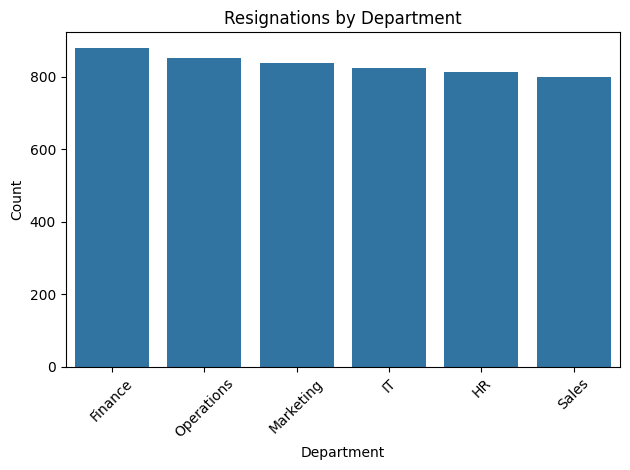

In [5]:
# Step 4: Department-Wise Resignations
dept_counts = df['Department'].value_counts()
sns.barplot(x=dept_counts.index, y=dept_counts.values)
plt.xticks(rotation=45)
plt.title("Resignations by Department")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


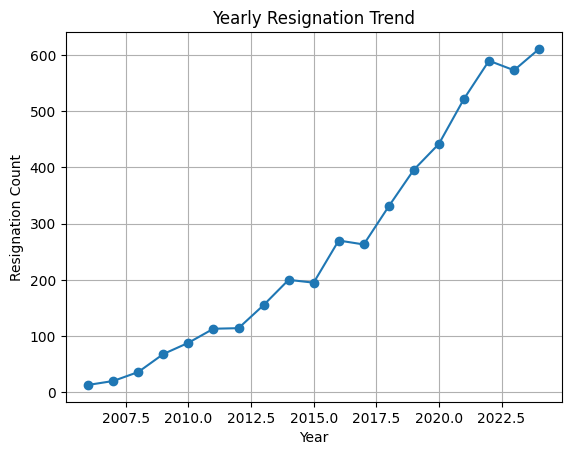

In [6]:
# Step 5: Resignation Trends Over Years
yearly_counts = df['YearOfExit'].value_counts().sort_index()
yearly_counts.plot(kind='line', marker='o')
plt.title("Yearly Resignation Trend")
plt.xlabel("Year")
plt.ylabel("Resignation Count")
plt.grid(True)
plt.show()


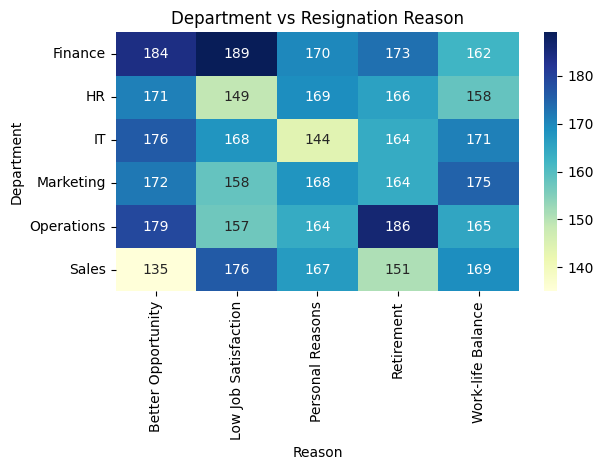

In [7]:
# Step 6: Reason vs Department Heatmap
pivot = pd.pivot_table(df, values='EmployeeID',
 index='Department',
 columns='ResignationReason',
 aggfunc='count', fill_value=0)
sns.heatmap(pivot, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Department vs Resignation Reason")
plt.ylabel("Department")
plt.xlabel("Reason")
plt.tight_layout()
plt.show()

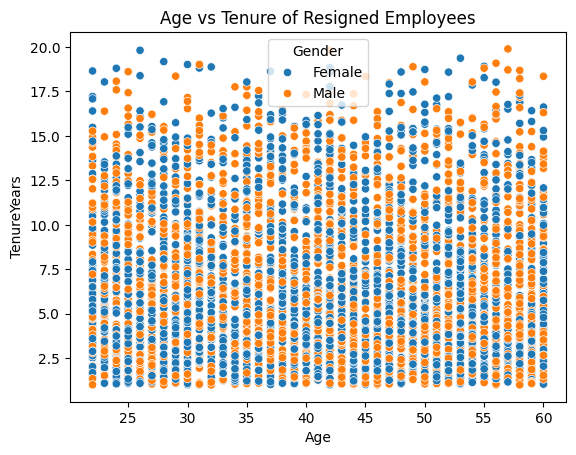

In [8]:
# Step 7: Age vs Tenure Scatter Plot
sns.scatterplot(data=df, x='Age', y='TenureYears', hue='Gender')
plt.title("Age vs Tenure of Resigned Employees")
plt.show()

In [9]:
summary = {
 "Total Resignations": df.shape[0],
 "Average Age": df['Age'].mean(),
 "Average Tenure": df['TenureYears'].mean(),
}
summary_df = pd.DataFrame([summary])
summary_df.to_excel("Resignation_Summary_Report.xlsx",
index=False)